In [3]:
#IMPORTING THE MODULES AND LIBRARIES
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [4]:
#LOADING THE DATA SET (CSV FILE)
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


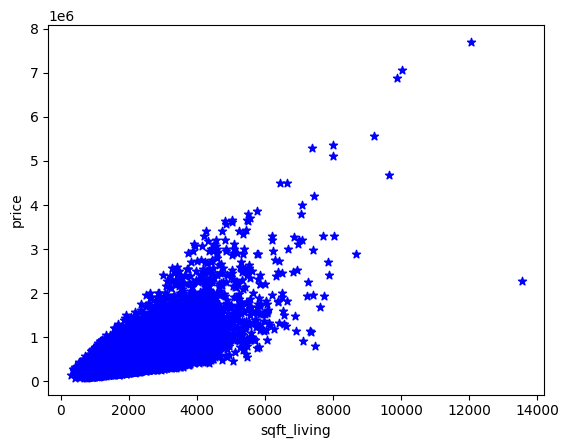

In [5]:
#PLOTTING THE GRAPH
%matplotlib inline
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.scatter(df.sqft_living,df.price,color='blue',marker='*')

In [6]:
#dropping useless columns
df.drop(['id','date','bathrooms','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'],axis='columns',inplace=True)
df.head()

,price,bedrooms,sqft_living,condition,yr_built
0,221900.0,3,1180,3,1955
1,538000.0,3,2570,3,1951
2,180000.0,2,770,3,1933
3,604000.0,4,1960,5,1965
4,510000.0,3,1680,3,1987


In [7]:
df.shape

(21613, 5)

In [8]:
#taking input
x=df.drop(['price','yr_built','condition','bedrooms'],axis='columns')
x

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [9]:
#taking output
y=df.price
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [10]:
#training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [11]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [12]:
#model performance
reg.score(x_test,y_test)

0.510499059846135

In [13]:
#m=coefficent
reg.coef_

array([275.11636313])

In [14]:
#c=intercept
reg.intercept_

-32006.059583659633

In [15]:
# y=mx +c
284.2706128*2500 + (-50474.955186059)

660201.576813941

In [16]:
reg.predict([[2500]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([655784.84823382])